<a href="https://colab.research.google.com/github/auditee/Auditee_SahaChowdhury_Zeotap-Assesment/blob/main/Auditee_SahaChowdhury_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: pip innstall

!pip install pandas


Customers Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null 

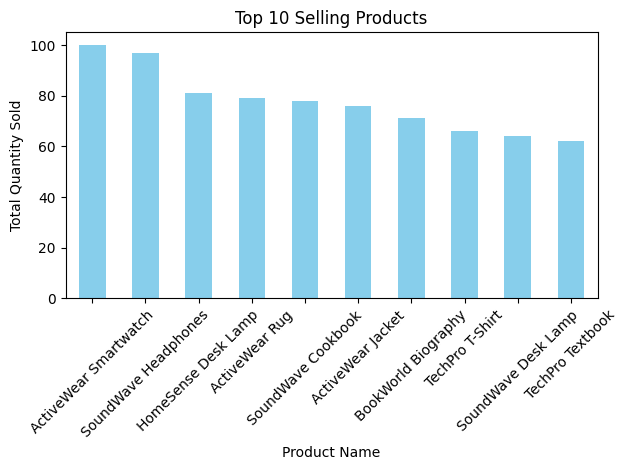

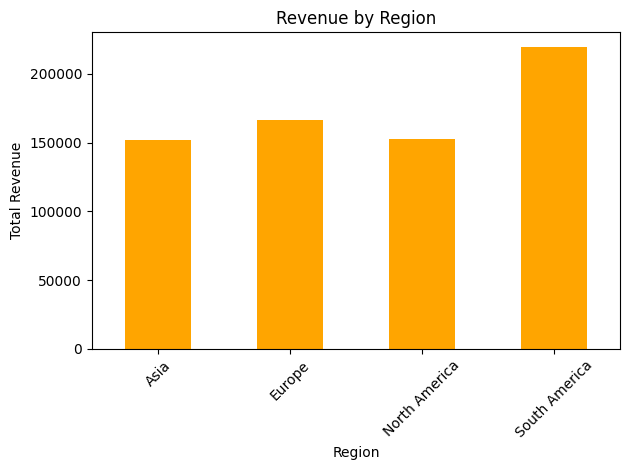

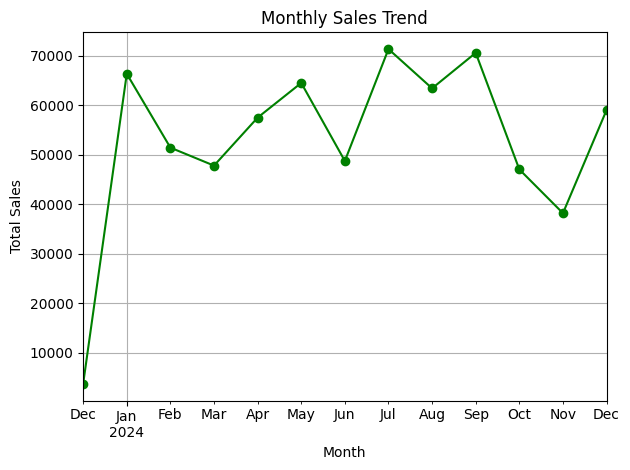

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

merged_data = pd.merge(transactions, customers, on="CustomerID").merge(products, on="ProductID")

print("Customers Summary:")
customers.info()
print("\nProducts Summary:")
products.info()
print("\nTransactions Summary:")
transactions.info()

print("\nCustomers Stats:\n", customers.describe(include="all"))
print("\nProducts Stats:\n", products.describe(include="all"))
print("\nTransactions Stats:\n", transactions.describe())

top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

region_revenue = merged_data.groupby("Region")["TotalValue"].sum()
region_revenue.plot(kind="bar", color="orange")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])  # Ensure datetime conversion
monthly_sales = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.tight_layout()
plt.show()